In [568]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import plot_tree
import seaborn as sns
import xlwt
from xlwt import Workbook
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn import datasets, linear_model, metrics

In [569]:
df = pd.read_csv("dataset/train.csv")
df = df.drop("Id",axis=1)


In [570]:
def check_null(val):
    count = 0
    x = df[val].isnull()
    arr = x.values.tolist()
    for i in arr:
        if(i):
            count+=1
    if(count<8):
        print("The length of the {} is {} and null values are {} and datatype is {}".format(val,str(len(arr)),str(count),df[val].dtypes ))
    return count

In [571]:
label = []
label_all = []
label_del = []

In [572]:
for col in df.columns:
    null = check_null(col)
    if(null<8):
        label.append(str(col))
    if(null>=8):
        label_del.append(str(col))
    label_all.append(str(col))

The length of the MSSubClass is 1460 and null values are 0 and datatype is int64
The length of the MSZoning is 1460 and null values are 0 and datatype is object
The length of the LotArea is 1460 and null values are 0 and datatype is int64
The length of the Street is 1460 and null values are 0 and datatype is object
The length of the LotShape is 1460 and null values are 0 and datatype is object
The length of the LandContour is 1460 and null values are 0 and datatype is object
The length of the Utilities is 1460 and null values are 0 and datatype is object
The length of the LotConfig is 1460 and null values are 0 and datatype is object
The length of the LandSlope is 1460 and null values are 0 and datatype is object
The length of the Neighborhood is 1460 and null values are 0 and datatype is object
The length of the Condition1 is 1460 and null values are 0 and datatype is object
The length of the Condition2 is 1460 and null values are 0 and datatype is object
The length of the BldgType is

In [573]:
print(len(label))
print(len(label_all))
print(len(label_del))

62
80
18


In [574]:
y = df["SalePrice"]
X = df.drop("SalePrice",axis=1)
for val in label_del:
    X = X.drop(val,axis=1)
    
print(X)

      MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0             60       RL     8450   Pave      Reg         Lvl    AllPub   
1             20       RL     9600   Pave      Reg         Lvl    AllPub   
2             60       RL    11250   Pave      IR1         Lvl    AllPub   
3             70       RL     9550   Pave      IR1         Lvl    AllPub   
4             60       RL    14260   Pave      IR1         Lvl    AllPub   
...          ...      ...      ...    ...      ...         ...       ...   
1455          60       RL     7917   Pave      Reg         Lvl    AllPub   
1456          20       RL    13175   Pave      Reg         Lvl    AllPub   
1457          70       RL     9042   Pave      Reg         Lvl    AllPub   
1458          20       RL     9717   Pave      Reg         Lvl    AllPub   
1459          20       RL     9937   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... OpenPorchSF EnclosedPorch  \
0       Inside 

In [575]:
################## CONVERTING THE STRING DATA TO THE INTEGER CLASSES USING LABEL ENCODER ###########
string_labels = []

for col in X.columns:
    if(type(X[col][0])==str):
        string_labels.append(col)
        
X["Electrical"].fillna("ayush",inplace = True)

le = preprocessing.LabelEncoder()


for col in string_labels:
    X[col] = le.fit_transform(X[col])

print(X)


      MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  Utilities  \
0             60         3     8450       1         3            3          0   
1             20         3     9600       1         3            3          0   
2             60         3    11250       1         0            3          0   
3             70         3     9550       1         0            3          0   
4             60         3    14260       1         0            3          0   
...          ...       ...      ...     ...       ...          ...        ...   
1455          60         3     7917       1         3            3          0   
1456          20         3    13175       1         3            3          0   
1457          70         3     9042       1         3            3          0   
1458          20         3     9717       1         3            3          0   
1459          20         3     9937       1         3            3          0   

      LotConfig  LandSlope 

In [576]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [577]:
print(X_train.shape)
print(y_train.shape)

(1168, 61)
(1168,)


In [578]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [579]:
y_pred = reg.predict(X_test)

In [580]:
colo = []
for col in X.columns:
    colo.append(col)
print(colo)
print(len(colo))
print(string_labels)
print(len(string_labels))

['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
61
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'Roo

Variance score: 0.8385144663023244


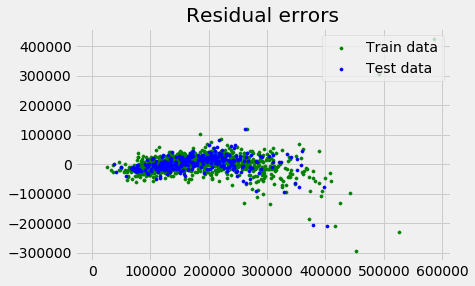

In [581]:
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
  
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

In [582]:
###################### TEST DATA PROCESSING ################################

test_data = pd.read_csv("dataset/test.csv")
print(test_data)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

In [583]:
############# DROPPING 1ST COLUMN #####################
test_data = test_data.drop("Id",axis=1)
#######################REMOVING ALL THE COLUMNS THAT WERE REMOVED FROM THE TRAINING DATA ##############333
for val in label_del:
    test_data = test_data.drop(val,axis=1)
           

      MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0             20       RH    11622   Pave      Reg         Lvl    AllPub   
1             20       RL    14267   Pave      IR1         Lvl    AllPub   
2             60       RL    13830   Pave      IR1         Lvl    AllPub   
3             60       RL     9978   Pave      IR1         Lvl    AllPub   
4            120       RL     5005   Pave      IR1         HLS    AllPub   
...          ...      ...      ...    ...      ...         ...       ...   
1454         160       RM     1936   Pave      Reg         Lvl    AllPub   
1455         160       RM     1894   Pave      Reg         Lvl    AllPub   
1456          20       RL    20000   Pave      Reg         Lvl    AllPub   
1457          85       RL    10441   Pave      Reg         Lvl    AllPub   
1458          60       RL     9627   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... OpenPorchSF EnclosedPorch  \
0       Inside 

In [584]:
########################## FILLING ALL THE NULL VALUES #################################
def fill_null(col):
    if col in string_labels:
        test_data[col].fillna("ayush",inplace = True)
    else:
        test_data[col].fillna(54321,inplace = True)
        
for i in test_data.columns:
    fill_null(i)

In [586]:
####################### CHECKING IF ALL THE VALUES HAVE BEEN FILLED ###########################
def check(val):
    count = 0
    x = test_data[val].isnull()
    arr = x.values.tolist()
    for i in arr:
        if(i):
            count+=1
    if(count<8):
        print("The length of the {} is {} and null values are {} and datatype is {}".format(val,str(len(arr)),str(count),test_data[val].dtypes ))

        
for i in test_data.columns:
    check(i)

The length of the MSSubClass is 1459 and null values are 0 and datatype is int64
The length of the MSZoning is 1459 and null values are 0 and datatype is object
The length of the LotArea is 1459 and null values are 0 and datatype is int64
The length of the Street is 1459 and null values are 0 and datatype is object
The length of the LotShape is 1459 and null values are 0 and datatype is object
The length of the LandContour is 1459 and null values are 0 and datatype is object
The length of the Utilities is 1459 and null values are 0 and datatype is object
The length of the LotConfig is 1459 and null values are 0 and datatype is object
The length of the LandSlope is 1459 and null values are 0 and datatype is object
The length of the Neighborhood is 1459 and null values are 0 and datatype is object
The length of the Condition1 is 1459 and null values are 0 and datatype is object
The length of the Condition2 is 1459 and null values are 0 and datatype is object
The length of the BldgType is

In [588]:
for col in string_labels:
    test_data[col] = le.fit_transform(test_data[col])

In [590]:
print(test_data.shape)
print(X.shape)

(1459, 61)
(1460, 61)


In [591]:
answer = reg.predict(test_data)

In [597]:
print(answer.shape)
print(answer[0])

(1459,)
105154.8749450054


In [598]:
wb = Workbook()
sheet1 = wb.add_sheet('Pricing') 
col_one = [i for i in range(1461,2920,1)]

for j in range(len(col_one)):
    sheet1.write(j+1, 0,col_one[j])
    
for j in range(len(answer)):
    sheet1.write(j+1,1,answer[j])
    

wb.save('Answer.xls') 